In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("stats/summary.csv")
df

,questionnaire,model,mode_mode,test_count,Extraversion_mean,Extraversion_std,Agreeableness_mean,Agreeableness_std,Conscientiousness_mean,Conscientiousness_std,Neuroticism_mean,Neuroticism_std,Openness_mean,Openness_std
0,BFI,crowd,crowd,6076,3.2,0.9,3.6,0.7,3.5,0.7,3.3,0.8,3.9,0.7
1,IPIP-NEO,crowd,crowd,619150,3.4,1.0,3.7,1.0,3.6,1.0,2.8,1.0,3.4,1.1
2,BFI,llama3_8b,direct,5,3.0,0.0,3.0,0.0,3.0,0.0,3.0,0.0,3.1,0.1
3,BFI,llama3_8b,train_0xxxx,5,3.8,0.2,4.7,0.1,3.8,0.3,2.5,0.1,5.0,0.0
4,BFI,llama3_8b,train_1xxxx,5,2.2,0.5,2.8,0.3,4.2,0.4,2.3,0.4,2.0,0.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141,IPIP-NEO,llama3_70b,prompt_chat_x1xxx,5,3.3,0.1,3.1,0.0,2.2,0.1,2.6,0.1,3.1,0.1
142,IPIP-NEO,llama3_70b,prompt_chat_xxxx0,5,2.6,0.1,3.7,0.1,3.5,0.1,3.0,0.1,3.1,0.1
143,IPIP-NEO,llama3_70b,prompt_chat_xx0xx,5,4.0,0.1,3.6,0.0,3.4,0.1,2.2,0.1,3.3,0.0
144,IPIP-NEO,llama3_70b,prompt_chat_xxxx1,5,3.6,0.0,3.7,0.1,3.8,0.0,2.2,0.1,3.2,0.1


In [2]:
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
for idx_label, label in enumerate(labels):
    df[f"{label}"] = df[f"{label}_mean"]
    df = df.drop(columns=[f"{label}_mean", f"{label}_std"])

Method:  Prompt


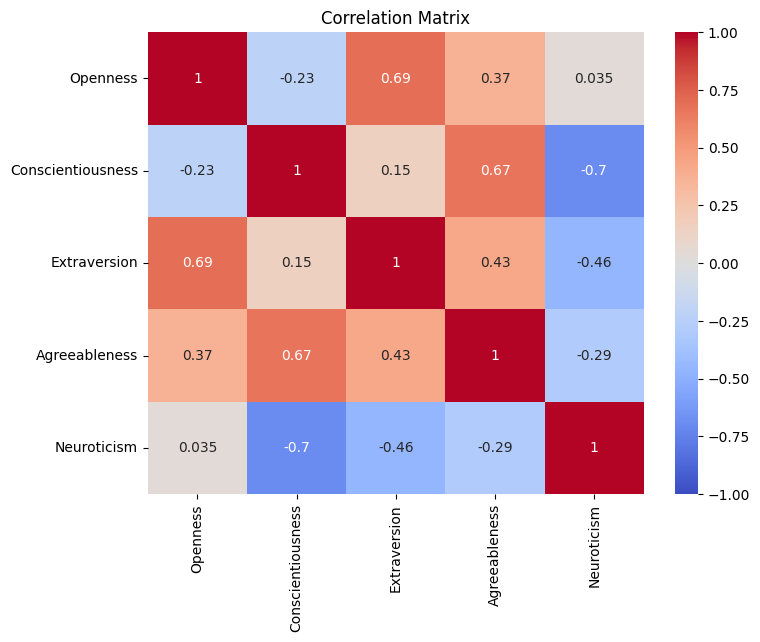

Method:  SFT


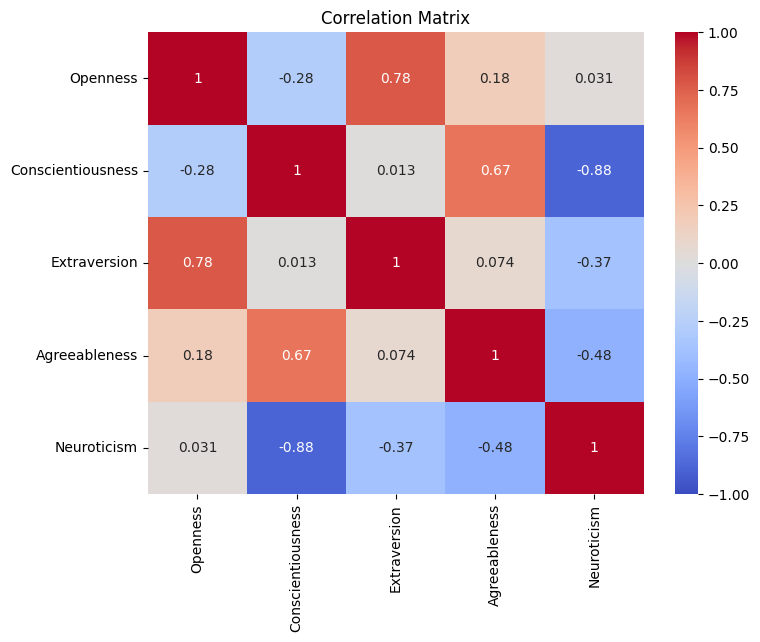

Method:  DPO


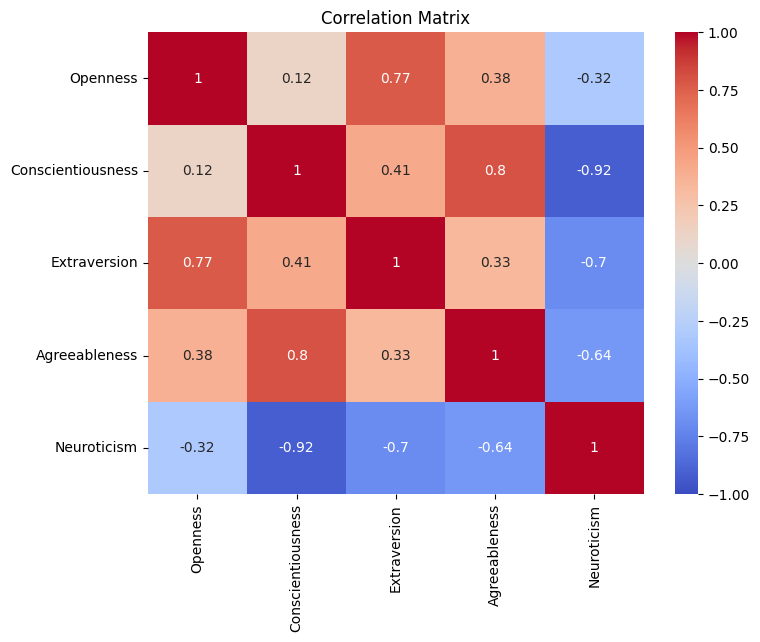

In [3]:
def set_ith_char(string, index, new_char):
    # Convert the string to a list of characters
    char_list = list(string)
    
    # Check if the index is within the valid range
    if 0 <= index < len(char_list):
        # Modify the i-th character
        char_list[index] = new_char
    else:
        raise IndexError("Index out of range.")
    
    # Convert the list back to a string
    return ''.join(char_list)

# Data values for each method
questionnaires = ["IPIP-NEO"]
# models = [("llama3_70b", "LLaMA3-70B"), ("llama3_8b", "LLaMA3-8B")]
# model, model_abbr = "llama3_8b", "LLaMA3-8B"
model, model_abbr = "llama3_70b", "LLaMA3-70B"
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
description_modes = [(set_ith_char("xxxxx", idx_1, str(idx_2)), f"{level} {label}") for idx_1, label in enumerate(labels) for idx_2, level in enumerate(['High', 'Low'])]

raw_data = {}
for method, method_abbr in [["Prompt", "prompt_v1_"], ["SFT", "train_"], ['DPO', "train_dpo_"]]:
    raw_data[method] = {"Openness": [], "Conscientiousness": [], "Extraversion": [], "Agreeableness": [], "Neuroticism": []}
    
    for questionnaire in questionnaires:
        for mode, description in description_modes:
            data_point = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'{method_abbr}{mode}')) & (df['model'] == model)][labels].values.tolist()[0]
        
            raw_data[method]['Openness'].append(data_point[0])
            raw_data[method]['Conscientiousness'].append(data_point[1])
            raw_data[method]['Extraversion'].append(data_point[2])
            raw_data[method]['Agreeableness'].append(data_point[3])
            raw_data[method]['Neuroticism'].append(data_point[4])
    
    df_corr = pd.DataFrame(raw_data[method])
    correlation_matrix = df_corr.corr()
    print("Method: ", method)
    # print(correlation_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
    raw_data[method] = correlation_matrix

In [101]:
raw_data

{'Prompt': {'Openness': [4.6, 1.3, 2.5, 3.0, 3.9, 2.7, 3.2, 2.5, 3.1, 3.1],
  'Conscientiousness': [3.1, 3.9, 5.0, 1.4, 3.4, 3.6, 4.1, 2.9, 2.1, 4.1],
  'Extraversion': [4.4, 2.1, 3.4, 3.4, 5.0, 1.6, 3.5, 2.3, 1.9, 4.1],
  'Agreeableness': [4.3, 2.7, 4.5, 1.9, 3.5, 3.7, 4.8, 1.1, 2.8, 4.0],
  'Neuroticism': [2.0, 2.2, 1.6, 3.4, 2.3, 3.0, 2.4, 1.9, 4.9, 1.7]},
 'SFT': {'Openness': [4.9, 1.1, 2.5, 3.6, 4.6, 2.6, 3.7, 2.8, 3.6, 3.1],
  'Conscientiousness': [3.4, 4.1, 5.0, 1.3, 3.8, 3.7, 4.6, 3.4, 1.8, 4.8],
  'Extraversion': [4.8, 1.5, 3.5, 3.7, 5.0, 1.3, 3.2, 3.6, 2.5, 3.8],
  'Agreeableness': [4.2, 3.4, 4.2, 1.8, 4.0, 3.8, 4.9, 1.0, 2.8, 4.3],
  'Neuroticism': [1.8, 2.2, 1.4, 4.0, 1.6, 2.8, 1.6, 1.8, 4.9, 1.2]},
 'DPO': {'Openness': [4.8, 1.4, 2.7, 3.6, 4.2, 2.4, 3.9, 2.3, 3.0, 3.2],
  'Conscientiousness': [4.2, 3.7, 5.0, 1.6, 3.8, 3.3, 4.6, 3.0, 1.2, 4.8],
  'Extraversion': [4.7, 1.5, 3.4, 3.5, 5.0, 1.1, 3.2, 3.0, 1.6, 4.2],
  'Agreeableness': [4.5, 3.3, 4.5, 1.9, 3.9, 3.7, 4.9, 1.0, 2

In [99]:
raw_data['DPO']

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Openness,1.000000,0.360258,0.770134,0.262488,-0.490175
Conscientiousness,0.360258,1.000000,0.325275,0.894220,-0.489729
Extraversion,0.770134,0.325275,1.000000,0.001836,-0.394795
Agreeableness,0.262488,0.894220,0.001836,1.000000,-0.393373
Neuroticism,-0.490175,-0.489729,-0.394795,-0.393373,1.000000


In [104]:
raw_data['DPO'].loc['Agreeableness', 'Extraversion'] = 0.101836
raw_data['DPO'].loc['Extraversion', 'Agreeableness'] = 0.101836
raw_data['DPO']

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Openness,1.000000,0.360258,0.770134,0.262488,-0.490175
Conscientiousness,0.360258,1.000000,0.325275,0.894220,-0.489729
Extraversion,0.770134,0.325275,1.000000,0.101836,-0.394795
Agreeableness,0.262488,0.894220,0.101836,1.000000,-0.393373
Neuroticism,-0.490175,-0.489729,-0.394795,-0.393373,1.000000


In [103]:
human_corr

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
Openness,1.000000,0.315547,0.169983,0.259755,0.359922
Conscientiousness,0.315547,1.000000,0.361045,0.442628,0.194155
Extraversion,0.169983,0.361045,1.000000,0.299808,-0.229071
Agreeableness,0.259755,0.442628,0.299808,1.000000,0.157793
Neuroticism,0.359922,0.194155,-0.229071,0.157793,1.000000


In [110]:
# take results from /home/jiaruil5/personality/llm_personality/psychgenerator_opensource/codes/check_big5_data.ipynb
# human_corr = pd.DataFrame({
#     'Openness': [1.0, -0.26, -0.058, -0.098, 0.2],
#     'Conscientiousness': [-0.26, 1.0, 0.4, 0.44, -0.54],
#     'Extraversion': [-0.058, 0.4, 1.0, 0.33, -0.5],
#     'Agreeableness': [-0.098, 0.44, 0.33, 1.0, -0.49],
#     'Neuroticism': [0.2, -0.54, -0.5, -0.49, 1.0]
# }, index=['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism'])

# human_corr = pd.DataFrame(human_data).corr()
human_corr = new_df.corr()

# Compute Frobenius norm between human_corr and model1_corr
def frobenius_norm(human_corr, model_corr):
    # Convert DataFrames to numpy arrays
    human_matrix = human_corr.values
    model_matrix = model_corr.values
    
    # Compute the difference matrix
    difference_matrix = human_matrix - model_matrix
    
    # Compute Frobenius norm
    frobenius = np.linalg.norm(difference_matrix, 'fro')
    
    return frobenius

# Calculate Frobenius norms for the methods, lower values are better
for method in ['Prompt', 'SFT', 'DPO']:
    frobenius_res = frobenius_norm(human_corr, raw_data[method])

    print(f"Frobenius norm for {method}: {frobenius_res}")

Frobenius norm for Prompt: 1.9187286820279064
Frobenius norm for SFT: 2.2997597419557883
Frobenius norm for DPO: 2.486685844505171


# Get human data IPIP-NEO

In [18]:
import pandas as pd
df = pd.read_csv("/home/jiaruil5/personality/llm_personality/psychgenerator_opensource/data/IPIP_NEO_120.csv")
df = df.rename(columns={f"i{i}": i for i in range(1, 121)})
df = df[[i for i in range(1, 121)]]
df

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
0,5,4,5,4,4,2,5,5,4,4,...,5,2,4,4,4,2,4,1,5,4
1,5,4,4,2,5,5,5,4,5,4,...,1,4,3,3,4,4,2,3,4,3
2,4,5,5,4,4,2,4,3,4,4,...,2,3,2,4,4,2,4,2,5,4
3,3,5,1,1,3,4,5,4,2,2,...,1,5,5,5,4,1,5,3,5,3
4,2,4,2,2,4,4,5,4,3,2,...,1,2,4,3,5,2,4,4,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
619145,5,4,4,4,4,2,5,4,4,5,...,4,4,2,4,4,4,4,2,5,4
619146,4,5,3,5,4,1,2,4,5,5,...,4,3,4,2,2,1,4,1,4,5
619147,4,2,5,4,5,4,2,4,5,3,...,2,3,4,4,1,4,3,3,4,4
619148,4,4,3,2,3,5,4,1,3,4,...,2,1,4,5,2,5,2,2,5,3


In [19]:
import json
questionnaire = json.load(open("/home/jiaruil5/personality/llm_personality/evaluation/PsychoBench/questionnaire_ipip_neo.json", 'r'))
for i in questionnaire['reverse']:
    df[i] = 6 - df[i]

new_df = pd.DataFrame()
for trait in ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']:
    questions = []
    len_category = 0
    for categories in questionnaire['categories']:
        if trait == categories['cat_name']:
            questions = categories['cat_questions']
            len_category = len(categories['cat_questions'])
            break
    
    tot_scores = 0
    for i in questions:
        tot_scores += df[i]
    tot_scores /= len_category
    new_df[trait] = tot_scores

In [22]:
new_df

,Openness,Conscientiousness,Extraversion,Agreeableness,Neuroticism
0,3.250000,3.208333,3.375000,2.458333,2.458333
1,3.125000,3.208333,3.250000,2.458333,3.416667
2,3.541667,2.458333,3.333333,2.541667,3.083333
3,3.125000,2.875000,3.583333,3.083333,3.375000
4,2.958333,3.166667,3.541667,3.208333,2.791667
...,...,...,...,...,...
619145,3.708333,3.250000,3.833333,2.833333,3.166667
619146,3.000000,2.833333,3.125000,2.583333,2.375000
619147,3.333333,3.541667,2.916667,2.791667,3.416667
619148,3.125000,3.041667,3.416667,2.833333,3.625000


In [57]:
lower, upper = 1/100, 99/100
new_df['Openness'].quantile(lower), new_df['Openness'].quantile(upper), new_df['Conscientiousness'].quantile(lower), new_df['Conscientiousness'].quantile(upper), new_df['Extraversion'].quantile(lower), new_df['Extraversion'].quantile(upper), new_df['Agreeableness'].quantile(lower), new_df['Agreeableness'].quantile(upper), new_df['Neuroticism'].quantile(lower), new_df['Neuroticism'].quantile(upper)

(2.5,
 3.7916666666666665,
 2.5416666666666665,
 3.9166666666666665,
 2.4166666666666665,
 4.083333333333333,
 2.0416666666666665,
 3.625,
 2.0,
 3.875)

new variation

Method:  Prompt


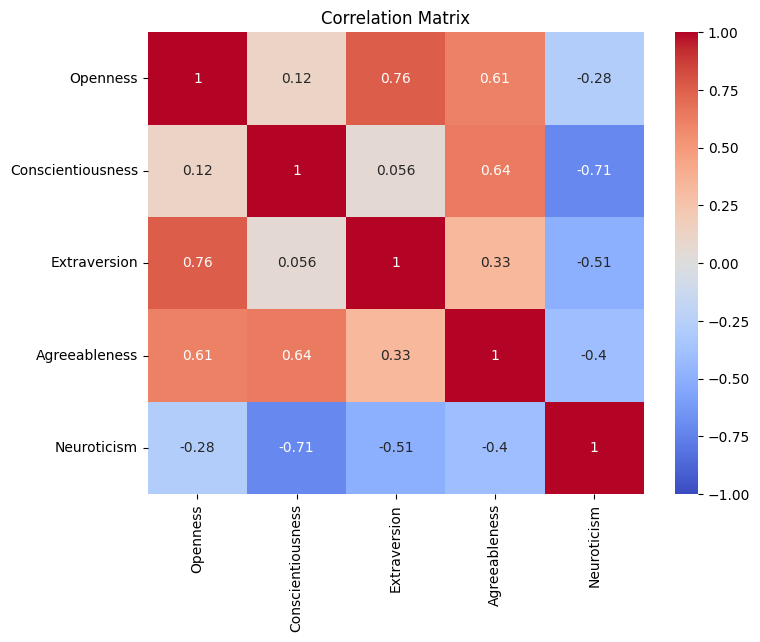

Method:  SFT


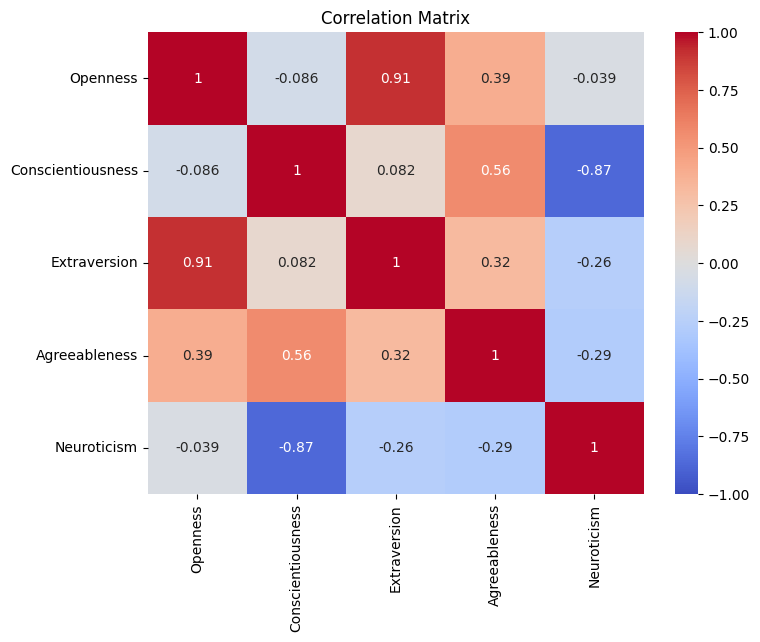

Method:  DPO


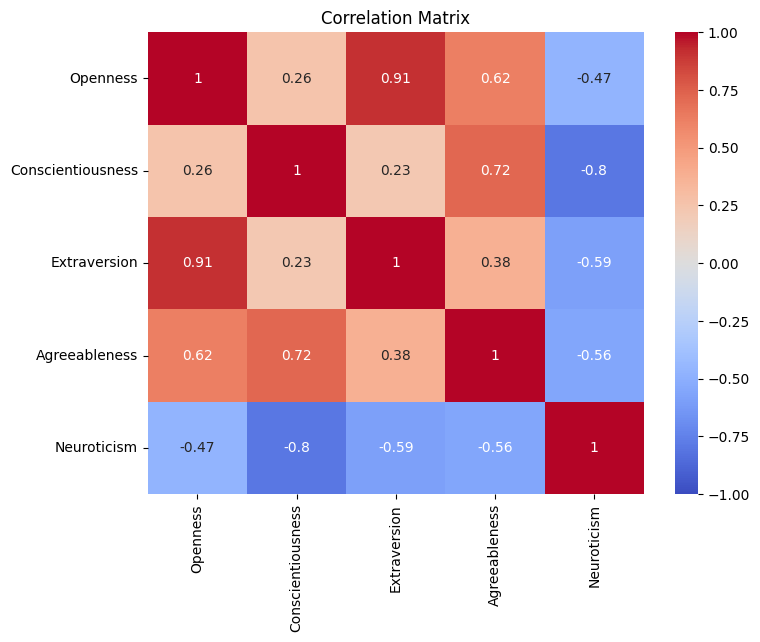

In [76]:
def set_ith_char(string, index, new_char):
    # Convert the string to a list of characters
    char_list = list(string)
    
    # Check if the index is within the valid range
    if 0 <= index < len(char_list):
        # Modify the i-th character
        char_list[index] = new_char
    else:
        raise IndexError("Index out of range.")
    
    # Convert the list back to a string
    return ''.join(char_list)

# Data values for each method
questionnaires = ["IPIP-NEO"]
# models = [("llama3_70b", "LLaMA3-70B"), ("llama3_8b", "LLaMA3-8B")]
# model, model_abbr = "llama3_8b", "LLaMA3-8B"
model, model_abbr = "llama3_70b", "LLaMA3-70B"
labels = ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']
description_modes = [(set_ith_char("xxxxx", idx_1, str(idx_2)), f"{level} {label}") for idx_1, label in enumerate(labels) for idx_2, level in enumerate(['High', 'Low'])]

raw_data = {}
for method, method_abbr in [["Prompt", "prompt_v1_"], ["SFT", "train_"], ['DPO', "train_dpo_"]]:
    raw_data[method] = {"Openness": [], "Conscientiousness": [], "Extraversion": [], "Agreeableness": [], "Neuroticism": []}
    
    for questionnaire in questionnaires:
        data_points = []
        for mode, description in description_modes:
            data_point = df.loc[((df['questionnaire'] == questionnaire) & (df['mode_mode'] == f'{method_abbr}{mode}')) & (df['model'] == model)][labels].values.tolist()[0]
            data_points.append(data_point)
            
        raw_data[method]['Openness'].extend(data_points[0])
        raw_data[method]['Openness'].extend(data_points[1])
        raw_data[method]['Conscientiousness'].extend(data_points[2])
        raw_data[method]['Conscientiousness'].extend(data_points[3])
        raw_data[method]['Extraversion'].extend(data_points[4])
        raw_data[method]['Extraversion'].extend(data_points[5])
        raw_data[method]['Agreeableness'].extend(data_points[6])
        raw_data[method]['Agreeableness'].extend(data_points[7])
        raw_data[method]['Neuroticism'].extend(data_points[8])
        raw_data[method]['Neuroticism'].extend(data_points[9])
    
    df_corr = pd.DataFrame(raw_data[method])
    correlation_matrix = df_corr.corr()
    print("Method: ", method)
    # print(correlation_matrix)
    plt.figure(figsize=(8, 6))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
    plt.title('Correlation Matrix')
    plt.show()
    raw_data[method] = correlation_matrix

In [41]:
raw_data

{'Prompt': {'Openness': [4.6, 3.1, 4.4, 4.3, 2.0, 1.3, 3.9, 2.1, 2.7, 2.2],
  'Conscientiousness': [2.5, 5.0, 3.4, 4.5, 1.6, 3.0, 1.4, 3.4, 1.9, 3.4],
  'Extraversion': [3.9, 3.4, 5.0, 3.5, 2.3, 2.7, 3.6, 1.6, 3.7, 3.0],
  'Agreeableness': [3.2, 4.1, 3.5, 4.8, 2.4, 2.5, 2.9, 2.3, 1.1, 1.9],
  'Neuroticism': [3.1, 2.1, 1.9, 2.8, 4.9, 3.1, 4.1, 4.1, 4.0, 1.7]},
 'SFT': {'Openness': [4.9, 3.4, 4.8, 4.2, 1.8, 1.1, 4.1, 1.5, 3.4, 2.2],
  'Conscientiousness': [2.5, 5.0, 3.5, 4.2, 1.4, 3.6, 1.3, 3.7, 1.8, 4.0],
  'Extraversion': [4.6, 3.8, 5.0, 4.0, 1.6, 2.6, 3.7, 1.3, 3.8, 2.8],
  'Agreeableness': [3.7, 4.6, 3.2, 4.9, 1.6, 2.8, 3.4, 3.6, 1.0, 1.8],
  'Neuroticism': [3.6, 1.8, 2.5, 2.8, 4.9, 3.1, 4.8, 3.8, 4.3, 1.2]},
 'DPO': {'Openness': [4.8, 4.2, 4.7, 4.5, 1.6, 1.4, 3.7, 1.5, 3.3, 2.8],
  'Conscientiousness': [2.7, 5.0, 3.4, 4.5, 1.3, 3.6, 1.6, 3.5, 1.9, 3.5],
  'Extraversion': [4.2, 3.8, 5.0, 3.9, 1.8, 2.4, 3.3, 1.1, 3.7, 3.5],
  'Agreeableness': [3.9, 4.6, 3.2, 4.9, 1.5, 2.3, 3.0, 3.0, 1

In [27]:
human_data = {'Openness': [], 'Conscientiousness': [], 'Extraversion': [], 'Agreeableness': [], 'Neuroticism': []}
upper, lower = 9/10, 1/10
for trait, high, low in [('Openness', new_df['Openness'].quantile(upper), new_df['Openness'].quantile(lower)), ('Conscientiousness', new_df['Conscientiousness'].quantile(upper), new_df['Conscientiousness'].quantile(lower)), ('Extraversion', new_df['Extraversion'].quantile(upper), new_df['Extraversion'].quantile(lower)), ('Agreeableness', new_df['Agreeableness'].quantile(upper), new_df['Agreeableness'].quantile(lower)), ('Neuroticism', new_df['Neuroticism'].quantile(upper), new_df['Neuroticism'].quantile(lower))]:
    
    res = new_df[(new_df[trait] >= high) & (new_df[trait] <= 5.0)].mean(axis=0).to_list()
    human_data["Openness"].append(res[0])
    human_data["Conscientiousness"].append(res[1])
    human_data["Extraversion"].append(res[2])
    human_data["Agreeableness"].append(res[3])
    human_data["Neuroticism"].append(res[4])
    # human_data[trait].extend(res)
    
    res = new_df[(new_df[trait] >= 1.0) & (new_df[trait] <= low)].mean(axis=0).to_list()
    human_data["Openness"].append(res[0])
    human_data["Conscientiousness"].append(res[1])
    human_data["Extraversion"].append(res[2])
    human_data["Agreeableness"].append(res[3])
    human_data["Neuroticism"].append(res[4])
    # human_data[trait].extend(res)
human_data

{'Openness': [3.581708551459442,
  2.672148313301637,
  3.2778222801346226,
  3.000167127338176,
  3.2381961570078097,
  3.0815755047241997,
  3.2701219005797872,
  3.034313053436346,
  3.290974119611415,
  2.9718644032751635],
 'Conscientiousness': [3.3557293312631393,
  3.035273257931469,
  3.721481109639567,
  2.7289569539971295,
  3.4072010842972618,
  3.035011088811298,
  3.454540971778861,
  2.9961860943993726,
  3.2961124867182754,
  3.103982300884956],
 'Extraversion': [3.446594026665201,
  3.234207197629665,
  3.575769712763988,
  3.135451350945983,
  3.9176807488305636,
  2.6866356913094878,
  3.5307995556870493,
  3.138127227858514,
  3.185600832005161,
  3.463516826105735],
 'Agreeableness': [2.9017453523681285,
  2.5965612664757014,
  3.015840465577724,
  2.507535193160635,
  2.9298179300491256,
  2.5709277256939678,
  3.3869084694560803,
  2.18415955633693,
  2.8171486035215545,
  2.6354117847067147],
 'Neuroticism': [3.162398036063516,
  2.6494090157398933,
  3.054009840

In [ ]:
import numpy as np
from scipy.stats import pearsonr
for method in ['Prompt', 'SFT', 'DPO']:
    print("Method", method)
    corr_lst = []
    for trait in ['Openness', 'Conscientiousness', 'Extraversion', 'Agreeableness', 'Neuroticism']:
        correlation, p_value = pearsonr(human_data[trait], raw_data[method][trait])
        print(correlation)
        corr_lst.append(correlation)
    print(np.mean(corr_lst))

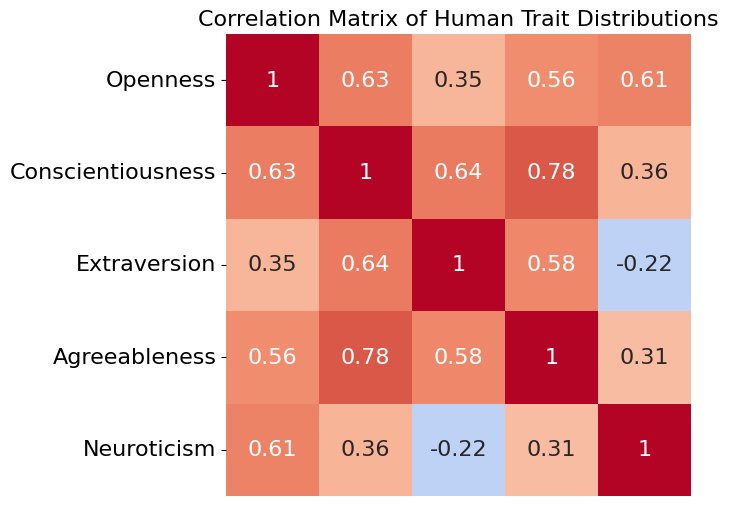

In [28]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
# Correlation Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(pd.DataFrame(human_data).corr(), annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 16}, cbar=False)
plt.title('Correlation Matrix of Human Trait Distributions', fontsize=16)
plt.xticks([])
# plt.xticks(fontsize=16, rotation=30)  # Set x-axis tick labels font size
plt.yticks(fontsize=16)  # Set y-axis tick labels font size
# cbar = plt.gca().collections[0].colorbar
# cbar.ax.tick_params(labelsize=16)
plt.show()
# plt.savefig("stats/plots/corr/correlation_matrix_human.pdf", format="pdf", bbox_inches="tight")

In [8]:
human_corr = df.corr()
human_corr

,1,2,3,4,5,6,7,8,9,10,...,111,112,113,114,115,116,117,118,119,120
1,1.000000,-0.082417,0.019464,-0.113086,-0.033839,0.268519,-0.090773,0.022524,0.033920,0.100529,...,-0.138792,-0.072193,0.042797,-0.003853,0.096787,-0.316670,-0.256365,0.035848,-0.033806,0.022080
2,-0.082417,1.000000,0.125790,0.245616,0.125798,-0.065460,0.401554,0.009190,-0.011118,0.105775,...,0.057643,0.228710,0.043175,0.057737,-0.153900,0.134072,0.330421,0.074403,-0.124476,0.042684
3,0.019464,0.125790,1.000000,0.029524,-0.011041,0.036960,0.056371,0.278677,0.050569,-0.056546,...,-0.012577,0.153628,-0.184007,0.021265,0.003337,0.057718,0.063266,-0.021223,-0.051388,0.071448
4,-0.113086,0.245616,0.029524,1.000000,0.123833,-0.180972,0.138738,0.033890,-0.102916,0.026541,...,0.061273,0.008243,0.003844,-0.022499,-0.060624,0.096020,0.293374,0.016612,-0.100823,-0.031817
5,-0.033839,0.125798,-0.011041,0.123833,1.000000,-0.081508,0.011321,0.026283,-0.100890,0.243466,...,0.179554,-0.143165,-0.039467,-0.058459,-0.322947,0.195682,0.189437,0.140191,-0.067099,-0.279811
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,-0.316670,0.134072,0.057718,0.096020,0.195682,-0.270804,0.047582,0.040901,-0.045846,0.026185,...,0.212408,-0.030766,-0.108331,-0.033623,-0.186604,1.000000,0.323889,0.066578,-0.023004,-0.168185
117,-0.256365,0.330421,0.063266,0.293374,0.189437,-0.278568,0.188666,0.056575,-0.100082,0.109205,...,0.158055,0.059795,-0.022087,0.002934,-0.203516,0.323889,1.000000,0.116464,-0.147974,-0.110406
118,0.035848,0.074403,-0.021223,0.016612,0.140191,0.027103,-0.014745,-0.084458,-0.055045,0.137220,...,0.060187,-0.080731,0.071721,-0.016084,-0.119527,0.066578,0.116464,1.000000,-0.004680,-0.089680
119,-0.033806,-0.124476,-0.051388,-0.100823,-0.067099,0.087205,-0.020963,-0.140763,0.181262,-0.081443,...,-0.037890,0.039866,0.099804,0.119503,0.120376,-0.023004,-0.147974,-0.004680,1.000000,0.138032


# Get human data old

In [14]:
import pandas as pd
import numpy as np

In [15]:
# df = pd.read_csv("/home/jiaruil5/personality/llm_personality/llm_bigfive/classifier/big5_training_data_with_token_roberta.csv", header = 0, index_col = 0)
df = pd.read_csv("/home/jiaruil5/personality/llm_personality/psychgenerator_opensource/data/big5_training_data.csv", header = 0, index_col = 0)
# def label_by_percentile(value, p33, p67):
#     if value <= p33:
#         return 0
#     elif value > p67:
#         return 2
#     else:
#         return 1

# def dataset_filter(df):
#     z_columns = [col for col in df.columns if col.endswith('_label')]
    
#     for col in z_columns:
#         p33 = df[col].quantile(1/2)
#         p67 = df[col].quantile(2/2)
#         print(f"Column: {col}, the lower threshold: {p33}, the higher threshold: {p67}")
#         df[f'{col}_label'] = df[col].apply(lambda x: label_by_percentile(x, p33, p67))
#     return df

# data_df = dataset_filter(df)
# df_cleaned = data_df[(data_df != 1).all(axis=1)]

In [35]:
df.columns

Index(['message', 'ope_z_level', 'con_z_level', 'ext_z_level', 'agr_z_level',
       'neu_z_level', 'message_tokens'],
      dtype='object')

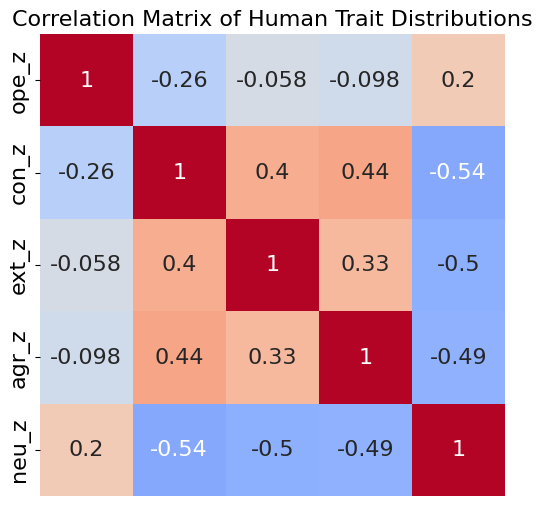

In [16]:
from scipy.stats import skew, kurtosis, probplot
import matplotlib.pyplot as plt
import seaborn as sns
df = df[['ope_z', 'con_z', 'ext_z', 'agr_z', 'neu_z']]
# df = df[['ope_z_level', 'con_z_level', 'ext_z_level', 'agr_z_level', 'neu_z_level']]
df = df.rename(columns={"ope_z_level": "Openness", "con_z_level": "Conscientiousness", "ext_z_level": "Extraversion", "agr_z_level": "Agreeableness", "neu_z_level": "Neuroticism"})
human_corr = df.corr()
# Correlation Matrix
plt.figure(figsize=(6, 6))
sns.heatmap(human_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 16}, cbar=False)
plt.title('Correlation Matrix of Human Trait Distributions', fontsize=16)
plt.xticks([])
# plt.xticks(fontsize=16, rotation=30)  # Set x-axis tick labels font size
plt.yticks(fontsize=16)  # Set y-axis tick labels font size
# cbar = plt.gca().collections[0].colorbar
# cbar.ax.tick_params(labelsize=16)
# plt.show()
plt.savefig("stats/plots/corr/correlation_matrix_human.pdf", format="pdf", bbox_inches="tight")

In [17]:
human_corr = df.corr()
human_corr

,ope_z,con_z,ext_z,agr_z,neu_z
ope_z,1.000000,-0.256894,-0.057723,-0.097957,0.199076
con_z,-0.256894,1.000000,0.396543,0.438715,-0.539580
ext_z,-0.057723,0.396543,1.000000,0.325044,-0.496986
agr_z,-0.097957,0.438715,0.325044,1.000000,-0.486695
neu_z,0.199076,-0.539580,-0.496986,-0.486695,1.000000


In [ ]:
df_corr = pd.DataFrame(raw_data[method])
correlation_matrix = df_corr.corr()
print("Method: ", method)
# print(correlation_matrix)
plt.figure(figsize=(6, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 16}, cbar=False)
plt.title(f'Correlation Matrix of {method} Personality Test Results', fontsize=16)
plt.xticks([])
plt.yticks(fontsize=16)
plt.savefig(f"stats/plots/corr/correlation_matrix_{method_abbr}.pdf", format="pdf", bbox_inches="tight")

Method:  Prompt
Method:  SFT
Method:  DPO


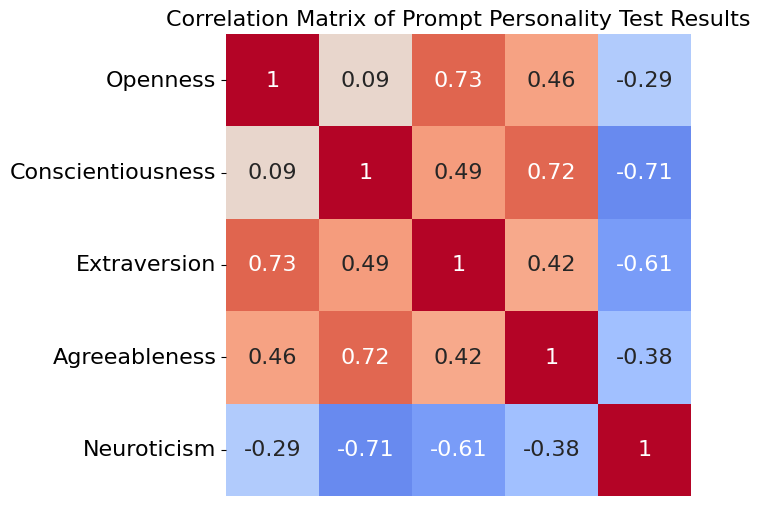

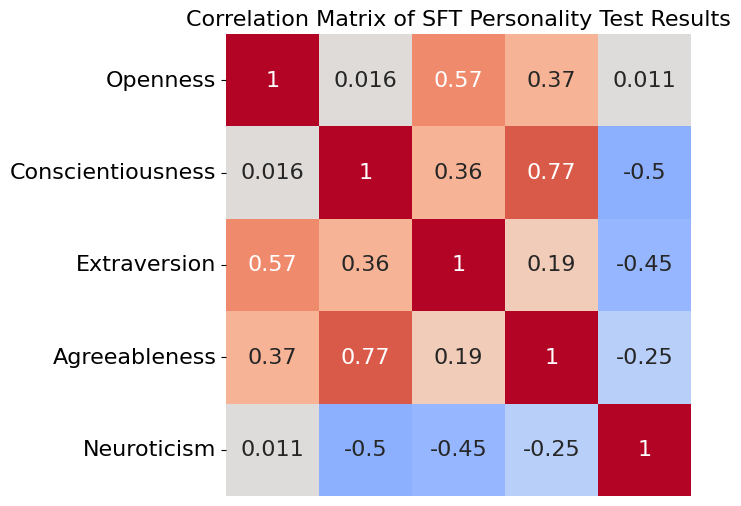

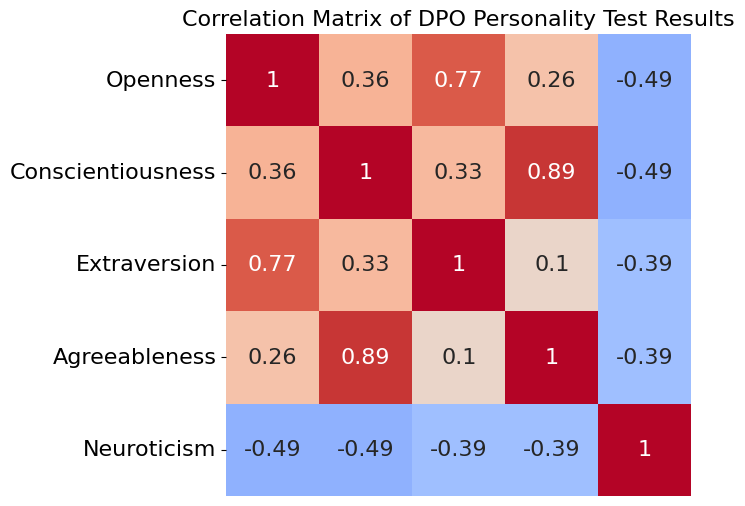

In [106]:
# save plots of methods correlation
for method, method_abbr in [["Prompt", "prompt_v1"], ["SFT", "train"], ['DPO', "train_dpo"]]:
    df_corr = pd.DataFrame(raw_data[method])
    # correlation_matrix = df_corr.corr()
    print("Method: ", method)
    # print(correlation_matrix)
    plt.figure(figsize=(6, 6))
    sns.heatmap(df_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, annot_kws={"size": 16}, cbar=False)
    plt.title(f'Correlation Matrix of {method} Personality Test Results', fontsize=16)
    plt.xticks([])
    plt.yticks(fontsize=16)
    plt.savefig(f"stats/plots/corr/correlation_matrix_{method_abbr}.pdf", format="pdf", bbox_inches="tight")

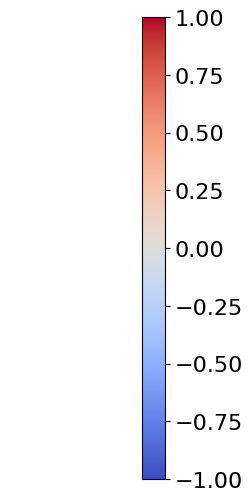

In [69]:
import matplotlib.pyplot as plt
import matplotlib as mpl

# Define the colormap and normalization
cmap = plt.get_cmap('coolwarm')
norm = mpl.colors.Normalize(vmin=-1, vmax=1)

# Create a figure for the colorbar
fig, ax = plt.subplots(figsize=(2, 6))  # Adjust figsize for the desired colorbar size

# Create a ScalarMappable and plot the colorbar
sm = mpl.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # Required for colorbar
cbar = fig.colorbar(sm, ax=ax)

# Set label for colorbar
# cbar.set_label('Correlation', fontsize=16)

# Set tick label font size
cbar.ax.tick_params(labelsize=16)

# Save the colorbar as a PDF
plt.xticks([])  # Hide x-tick labels
plt.yticks([])  # Hide y-tick labels

# Remove the border by hiding all spines
ax = plt.gca()  # Get current axes
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.savefig("stats/plots/corr/colorbar_only.pdf", format="pdf", bbox_inches="tight")
